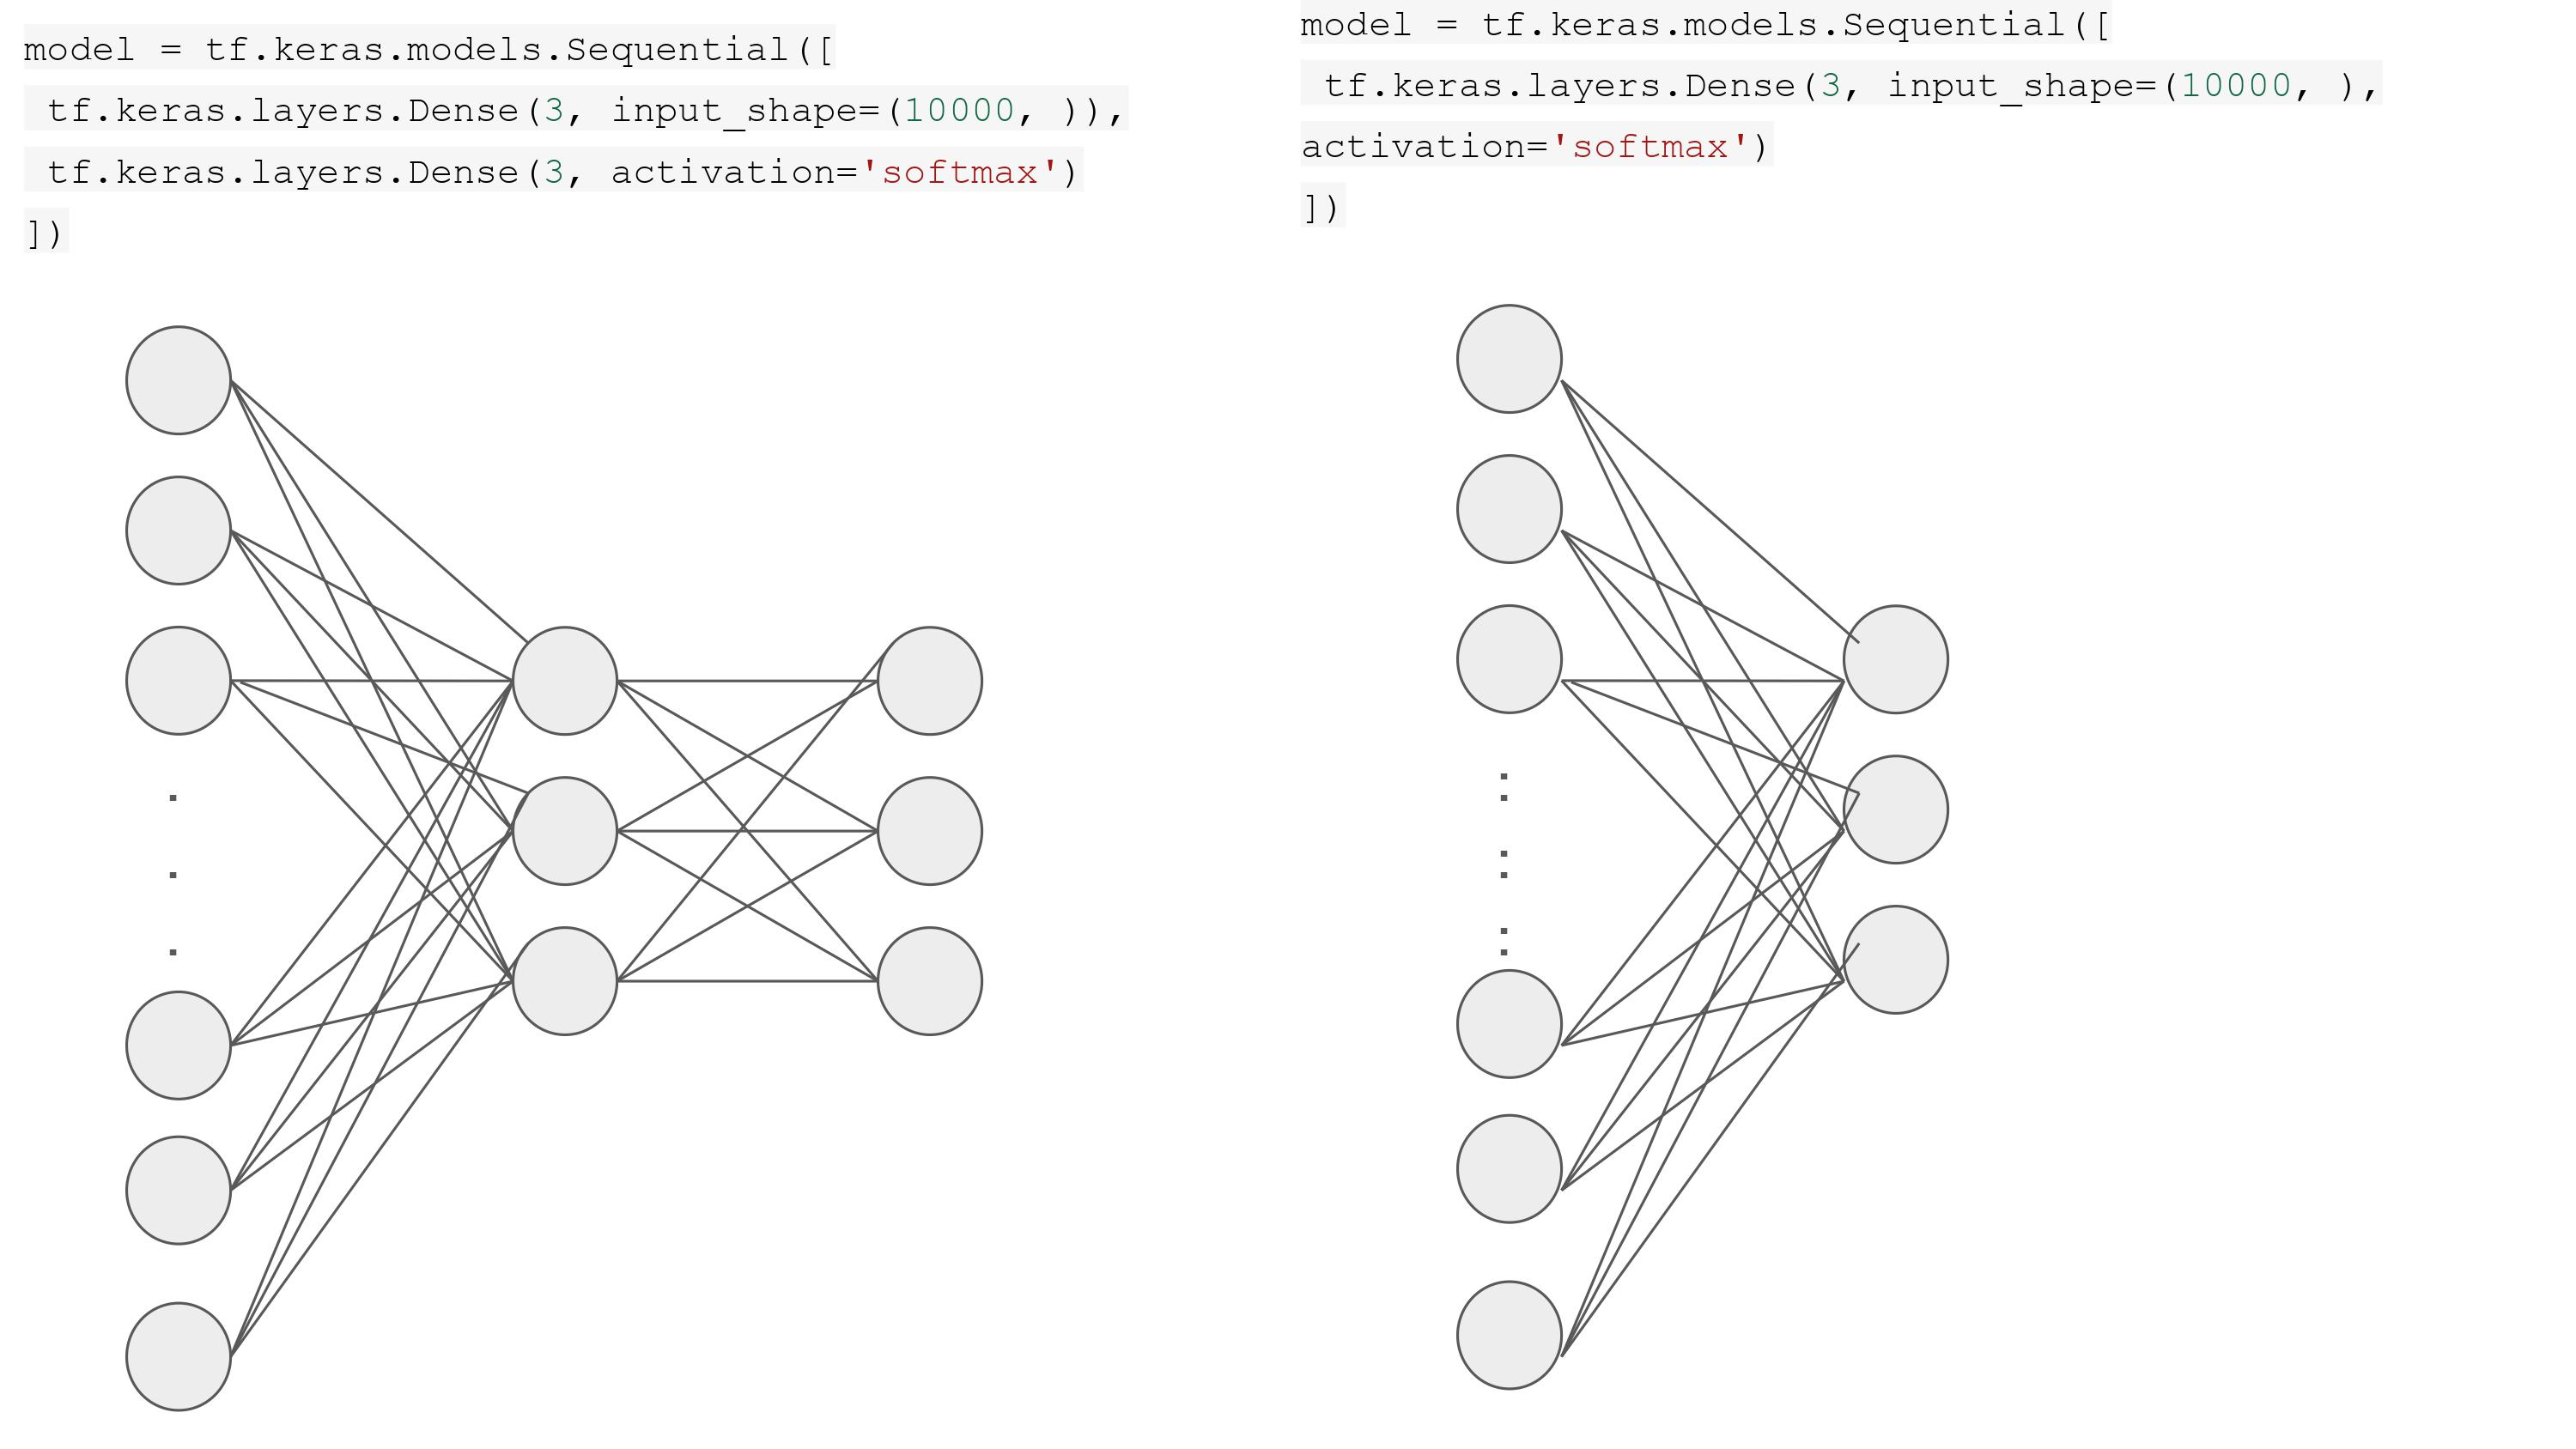

## Preprocessing the dataset for regression
1. Standardization : Change data into the distribution with mean 0 and std1

$$x_{new} = \frac{x-mean(X)}{SD(x)}$$

2. Min-Max normalization : change date with max 1 and min 0

$$x_{new} = \frac{x-min(X)}{max(X)-min(X)}$$


2025.1.15
1. Try with three node

2. Try Eq.(11)

In [2]:
import zipfile
# import tensorflow as tf
import os
# import  imageio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from keras.utils import to_categorical #For keras > 2.0
# import cv2
import scipy.io
from sklearn.model_selection import train_test_split
# from keras import initializers
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
# from pyESN.pyESN import ESN

In [3]:
# mat = scipy.io.loadmat('case3_quantum.mat')
mat = scipy.io.loadmat('case3_5000.mat')
mat2 = scipy.io.loadmat('g2_a.mat')
mat3 = scipy.io.loadmat('case3_extended_8000.mat')



ns = mat['ns']
n_classic = mat2['n_a']
g2 = mat['g2_a']
g2_classic = mat['g2_a']
Delta = mat['Delta1_vector']


ns3_extended = mat3['ns']
nn_classic = mat3['n_a']
# ns3_extended = ns3_extended[1000:3000]
g2_case3_extended = abs(mat3['g2_a'])
# g2_case3_extended = g2_case3_extended[1000:3000]
Delta_extended = mat3['Delta1_vector'][0]
# Delta_extended = Delta_extended[1000:3000]

In [4]:

# ax1.set_yticks(fontsize=25)
# ax1.set_xticks([-10],fontsize=25)


# plt.plot(Delta_extended, nn_classic_extended, color='tomato')
# plt.plot(Delta_extended, g2_case3_extended, color='cornflowerblue')
# plt.xlabel("$\Delta_{b}$",fontsize=20)
# plt.ylabel('$<a^{\dagger}a>$',fontsize=20, color='tomato')
# plt.xticks([-10,-5,0,5,10],fontsize=20)
# plt.yticks([0.1,0.3,0.5,0.7],fontsize=20)
# # plt.yticks([1.0,2,3,4,5],fontsize=20)

In [158]:
# np.shape(n_squ)
n_case3_extended_Delta = []
g2_re_extended = []
n_classic = []
# g2_squ_1000 = []
# for i in range(1000,3000,1):
for i in range(8000):
    n_case3_extended_Delta.append(ns3_extended[0][i][0])
    g2_re_extended.append({g2_case3_extended[i][0]:Delta_extended[i]})
    n_classic.append(nn_classic[i][0])

def multiplexing(n_case3_extended_Delta, num_multi):
# num_multi = 5
    n_case3_extended_Delta_multiplexing = [] 
    for i in range(len(n_case3_extended_Delta)):
        n_case3_extended_Delta_multiplexing.append(n_case3_extended_Delta[i][0:num_multi])

    X_train_c3_ex, X_test_c3_ex, Y_train_c3_ex, Y_test_c3_ex = train_test_split(n_case3_extended_Delta_multiplexing,g2_re_extended, test_size=0.05)
    
    
    Y_train_g2 = []
    Y_train_r = []
    
    Y_test_g2 = []
    Y_test_r = []
    
    
    for ele in Y_train_c3_ex:
      key = list(ele.keys())
      value = list(ele.values())
      Y_train_g2.append(key)
      Y_train_r.append(value[0])
    Y_train_g2 = np.reshape(Y_train_g2,(len(Y_train_g2),1))
    
    for ele in Y_test_c3_ex:
      key = list(ele.keys())
      value = list(ele.values())
      Y_test_g2.append(key[0])
      Y_test_r.append(value[0])
    Y_test_g2 = np.reshape(Y_test_g2,(len(Y_test_g2),1))
    
    # regressor = RandomForestRegressor(n_estimators=100)
    regressor = ExtraTreesRegressor()
    regressor.fit(X_train_c3_ex, Y_train_g2)
    Y_predict_RFR = regressor.predict(X_test_c3_ex)
    # plt.scatter(Y_test_r, Y_test_g2,label = 'Ground Truth')
# plt.scatter(Y_test_r, Y_predict_RFR,marker="+",s=25,label = 'Reservoir')
    # [mean_squared_error(Y_test_g2, Y_predict_RFR)]
    return n_case3_extended_Delta_multiplexing, Y_test_r, Y_test_g2, Y_predict_RFR, mean_squared_error(Y_test_g2, Y_predict_RFR)



C:\Users\kodo0\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


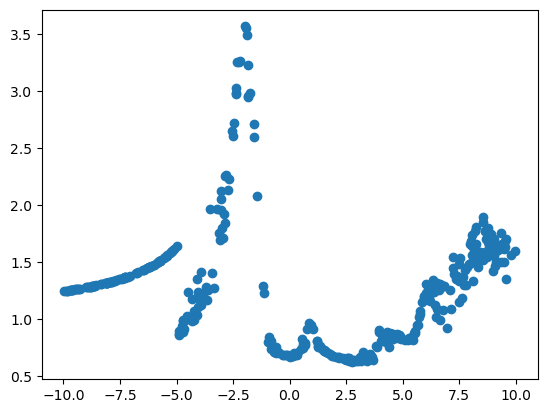

In [165]:
nnn, Y_test_r, Y_test_g2, Y_predict_RFR, MSE = multiplexing(n_case3_extended_Delta,4)
plt.scatter(Y_test_r, Y_predict_RFR)
# nnn

In [169]:
nnn, Y_test_r, Y_test_g2, Y_predict_RFR, MSE = multiplexing(n_case3_extended_Delta,29)

C:\Users\kodo0\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [178]:
Y_predict_ = []
MSE_list = [] 
Y_test_r_multi = []
for i in list(range(1, 20 + 1)):
    nnn, Y_test_r, Y_test_g2, Y_predict_RFR, MSE = multiplexing(n_case3_extended_Delta,i)
    Y_predict_.append(Y_predict_RFR)
    Y_test_r_multi.append(Y_test_r)
    MSE_list.append(MSE)
    # plt.plot(Y_test_r, Y_test_g2)

C:\Users\kodo0\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\kodo0\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\kodo0\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\kodo0\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

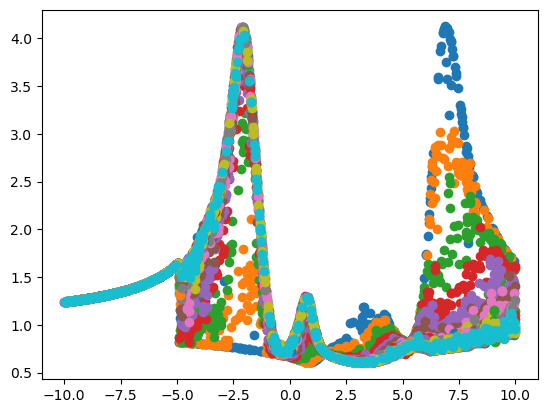

In [180]:
for i in range(20):
    plt.scatter(Y_test_r_multi[i], Y_predict_[i])

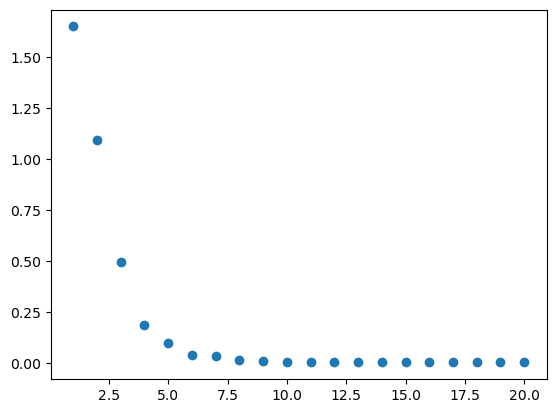

In [186]:
plt.scatter(list(range(1, 20 + 1)), MSE_list)

In [193]:
MSE_list

[1.648624691794677,
 1.0906879135953857,
 0.4937603107955673,
 0.18902158522627693,
 0.1019060207877711,
 0.04218233913014432,
 0.03469050213644403,
 0.014185594024969652,
 0.009628373291840476,
 0.005821956536571962,
 0.004919095439915663,
 0.004954387923250892,
 0.005646835017518903,
 0.004984354163519588,
 0.004153711717197207,
 0.005069724586819678,
 0.005847043531223676,
 0.00662059575189603,
 0.006798092611128423,
 0.00718030402399886]

In [192]:
plt.scatter(MSE_list)

TypeError: scatter() missing 1 required positional argument: 'y'

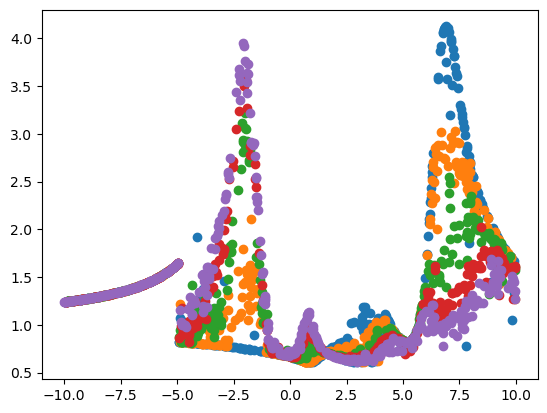

In [187]:
for i in range(5):
    plt.scatter(Y_test_r_multi[i], Y_predict_[i])

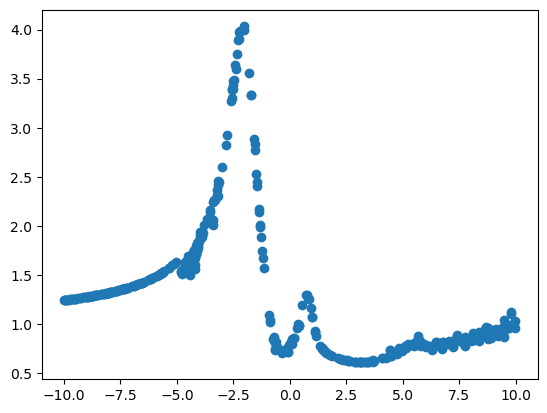

In [191]:
i = 19
plt.scatter(Y_test_r_multi[i], Y_predict_[i])

In [95]:
Y_train_g2 = []
Y_train_r = []

Y_test_g2 = []
Y_test_r = []


for ele in Y_train_c3_ex:
  key = list(ele.keys())
  value = list(ele.values())
  Y_train_g2.append(key)
  Y_train_r.append(value[0])
Y_train_g2 = np.reshape(Y_train_g2,(len(Y_train_g2),1))

for ele in Y_test_c3_ex:
  key = list(ele.keys())
  value = list(ele.values())
  Y_test_g2.append(key[0])
  Y_test_r.append(value[0])
Y_test_g2 = np.reshape(Y_test_g2,(len(Y_test_g2),1))


In [96]:
# regressor = RandomForestRegressor(n_estimators=100)
regressor = ExtraTreesRegressor()
regressor.fit(X_train_c3_ex, Y_train_g2)
Y_predict_RFR = regressor.predict(X_test_c3_ex)


C:\Users\kodo0\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [97]:
print([mean_squared_error(Y_test_g2, Y_predict_RFR)])

[0.10024122451814761]


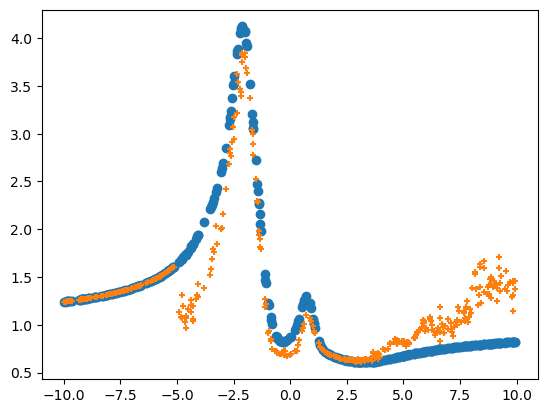

In [98]:
plt.scatter(Y_test_r, Y_test_g2,label = 'Ground Truth')
plt.scatter(Y_test_r, Y_predict_RFR,marker="+",s=25,label = 'Reservoir')

In [ ]:
# plt.scatter(Y_test_r, Y_test_g2,label = 'GroundTruth $g^{(2)}$')
# plt.scatter(Y_test_r, Y_predict_RFR,marker="+",s=25,label = 'Reservoir $g^{(2)}$')
# plt.scatter(Y_test_r_c, Y_predict_RFR_classic,marker="x",s=25,label = 'No reservoir $g^{(2)}$', alpha=0.5)
# plt.xlabel('$\Delta_{b}$',fontsize=20)
# plt.ylabel('$g^{(2)}$',fontsize=20)
# plt.xticks([-10,-5,0,5,10],fontsize=20)
# plt.yticks([1,2,3,4],fontsize=20)
# plt.legend(fontsize=16.8,markerscale=2,handletextpad=0.001, loc=1)
# ax = plt.gca() #you first need to get the axis handle
# ax.set_aspect(4) #sets the height to weight ratio to 2
# # plt.plot(x,y)